# PUP UNIVERSITY INTRAMURALS: CCIS TEAM ANALYSIS

This is an analysis of all the student athletes in the College of Computer and Information Sciences that participated on the PUP University intramurals 2023. The CCIS only have 2 course, Bachelor of Science in Computer Science and Bachelor of Science in Information Technology. These analysis wants to answer these following questions: 
1. Which among the two courses are more active in terms of sports?
2. How many students participated in each year level? is there a huge difference between the number of players in third and fourth year?
3. What is the average physicality of the athletes? (Height, Weight, BMI)
4. Is there certain month where a lot of athletes are born on and what is the spread of it?  a?


# Import and Merging 

Importing os, pandas and seaborn are all needed for analysis (you can also use matplotlib instead of seaborn but i highly suggest just use seaborn because why not) 
- os for the merging csv files
- pandas for querying, manipulation and analysis of the data
- seaborn for plotting and creating visual outputs

In [17]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ccis_df = pd.DataFrame()

for file in os.listdir(os.getcwd()):
    if file.endswith('.csv'):
        ccis_df = ccis_df._append(pd.read_csv(file))

ccis_df.to_csv('CCIS.csv', index = True)
ccis_df = pd.read_csv("CCIS.csv")

Our first goal is know the number of players in each courses, and also their year level


1. Change the phrase "Bachelor of Science in Computer Science" to "BSCS" and "Bachelor of Science in Information Technology" to "BSIT"

In [ ]:
ccis_df['COURSE'] = ccis_df['COURSE'].replace({"Bachelor of Science in Computer Science": "BSCS"})
ccis_df['COURSE'] = ccis_df['COURSE'].replace({"Bachelor of Science in Information Technology": "BSIT"})

2. First lets count the number of BSCS students.

In [ ]:
cs = ccis_df[ccis_df["COURSE"] == "BSCS"]
cs = cs[['COURSE', "STUDENT NO"]]

cs_first_year = 0
cs_second_year = 0
cs_third_year = 0
cs_fourt_year = 0

for year in cs["STUDENT NO"]:
    if "2023" in year:
           cs_first_year += 1
    if "2022" in year:
        cs_second_year += 1
    if "2021" in year:
        cs_third_year += 1
    if "2020" in year:
        cs_fourt_year += 1
        
print("\nPlayers in the CS Course")
print(f"The number of players from CS: {len(cs)}")
print(f"number of first year(s):{cs_first_year}")
print(f"number of second year(s):{cs_second_year}")
print(f"number of third year(s):{cs_third_year}")
print(f"number of fourth year(s):{cs_fourt_year}")
print(" ")

3. Now, lets do the same thing with BSIT student.

In [ ]:
it = ccis_df[ccis_df["COURSE"] == "BSIT"]
it = it[['COURSE', "STUDENT NO"]]

it_first_year = 0
it_second_year = 0
it_third_year = 0
it_fourt_year = 0

for year in it["STUDENT NO"]:
    if "2023" in year:
        it_first_year += 1
    if "2022" in year:
        it_second_year += 1
    if "2021" in year:
        it_third_year += 1
    if "2020" in year:
        it_fourt_year += 1
        
print(f"The number of players from IT: {len(it)}")
print("Players in the IT Course")
print(f"number of first year(s):{it_first_year}")
print(f"number of second year(s):{it_second_year}")
print(f"number of third year(s):{it_third_year}")
print(f"number of fourth year(s):{it_fourt_year}")

4. Now let's identify by their year level. The given dataset had "STUDENT NO" in it, and the first four digits of it indicates the year they started college in PUP (afaik, you cannot transfer to pup in 2nd-4th year or if yes, im not sure on the format of their student no). The current SY for this dataset is 2023-2024 so we should expect that every student that has 2023 in their student number are first year, students that have 2022 are second years, 2021 are third years, and lastly those who have 2020 are the seniors or fourth year.

In [ ]:
year = ccis_df['STUDENT NO']
year_level = []
for year in ccis_df["STUDENT NO"]:
    if "2023" in year:
        year_stud = 1
        year_level.append(year_stud)
    if "2022" in year:
        year_stud = 2
        year_level.append(year_stud)
    if "2021" in year:
        year_stud = 3
        year_level.append(year_stud)
    if "2020" in year:
        year_stud = 4
        year_level.append(year_stud)

ccis_df['YEAR LEVEL'] = year_level
print(ccis_df.head())

5. After that, we can now find the average physicality of all students who will participate in the intramurals. Good thing the 'HEIGHT' and 'WEIGHT' are already provided. With these we can now just solve for their BMI. The formula for this is weight/(height in meters)^2. As you can see in the dataset the height is in centimeter. So we need to convert it to meters and in order to do that, we just need to divide it by 100. 

In [ ]:
# def bmi(ccis_df):
height = ccis_df['HEIGHT']
weight = ccis_df['WEIGHT']
BMI = []
for i in range(len(ccis_df)):
    meters = height[i]/100
    bmi = weight[i]/(meters*meters)
    answer = round(bmi,2)
    BMI.append(answer)

ccis_df['BMI'] = BMI
print(ccis_df.head())
        
# bmi(ccis_df)

6. This is optional but still a good thing to know. Upon reading the dataset the first thing I noticed are the birthdays and i was like can the computer sort this kind of value? then upon researching i stumbled upo the datetime function where it converts the date format in a universal format that the computer can read.

In [ ]:
ccis_df["BIRTHDATE"] = pd.to_datetime(ccis_df['BIRTHDATE'])
bday = ccis_df['BIRTHDATE']
ccis_df.update(bday)
print(ccis_df.sort_values('BIRTHDATE').head())

7. After converting the 'BIRTHDATE' to the universal format, we can now easily count how many players have the same birthmonth. And from this we can see, if there is a month that is shared by a lot of participants.

In [ ]:
date = pd.DatetimeIndex(ccis_df['BIRTHDATE'])
ccis_df['MONTH'] = date.month
months = ccis_df['MONTH']
jan = 0
feb = 0
march = 0
apr = 0
may = 0
june = 0
july = 0
aug= 0
sep = 0
oct = 0
nov = 0
dec = 0
for i in months:
    if i == 1:
        jan += 1
    if i == 2:
        feb += 1
    if i == 3:
        march += 1
    if i == 4:
        apr += 1
    if i == 5:
        may += 1
    if i == 6:
        june += 1
    if i == 7:
        july += 1
    if i == 8:
        aug += 1
    if i == 9:
        sep += 1
    if i == 10:
        oct += 1
    if i == 11:
        nov += 1
    if i == 12:
        dec += 1
print(f'jan: {jan}')
print(f'feb: {feb}')
print(f'march: {march}')
print(f'apr: {apr}')
print(f'may: {may}')
print(f'june: {june}')
print(f'july: {july}')
print(f'aug: {aug}')
print(f'sep: {sep}')
print(f'oct: {oct}')
print(f'nov: {nov}')
print(f'dec: {dec}')
sns.countplot(x = 'MONTH', data=ccis_df)

8. Now, lets know the average physicality of all the participants. First we need to get the column of 'AGE', 'HEIGHT','BMI', and 'WEIGHT'. After we will now loop through it and find its average.

In [136]:
age = ccis_df['AGE']
age_total = 0
for i in age:
    age_total += i

age_avg = age_total/(len(age))
age_avg = round(age_avg, 2)
print(f"The average age of all participants are: {age_avg}")
    

20.24


In [138]:
height = ccis_df['HEIGHT']
height_total = 0
for i in height:
    height_total += i

height_avg = height_total/(len(age))
height_avg = round(height_avg, 2)
print(f"The average height of all participants are: {height_avg} cm")
    

The average height of all participants are: 166.65


In [140]:
weight = ccis_df['WEIGHT']
weight_total = 0
for i in weight:
    weight_total += i

weight_avg = weight_total/(len(age))
weight_avg = round(weight_avg, 2)
print(f"The average weight of all participants are: {weight_avg} kg")

The average weight of all participants are: 61.81 kg


In [144]:
BMI = ccis_df['BMI']
BMI_total = 0
for i in BMI:
    BMI_total += i

BMI_avg = BMI_total/(len(age))
BMI_avg = round(BMI_avg, 2)
print(f"The average weight of all participants are: {BMI_avg} ")

The average weight of all participants are: 22.28 


# Now its plotting time!

With these plot we can clearly see and say that there are more BSIT students then BSCS students that participated in PUP Intramurals. 28 students are from BSIT and 18 students are from BSCS. So  i will say that during this year, BSIT students are more physically active than BSCS students

<Axes: xlabel='COURSE', ylabel='count'>

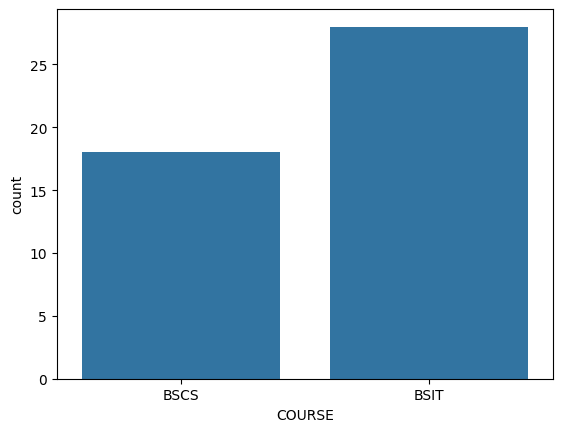

In [141]:
sns.countplot(x = "COURSE", data=ccis_df)

The plot below shows the distribution of particapants in each year level and courses. Both significant value here are both BSIT, you can see that there is only one first year student participated during the event and the largest group in both per Course and in total are 2nd year students.

<Axes: xlabel='YEAR LEVEL', ylabel='count'>

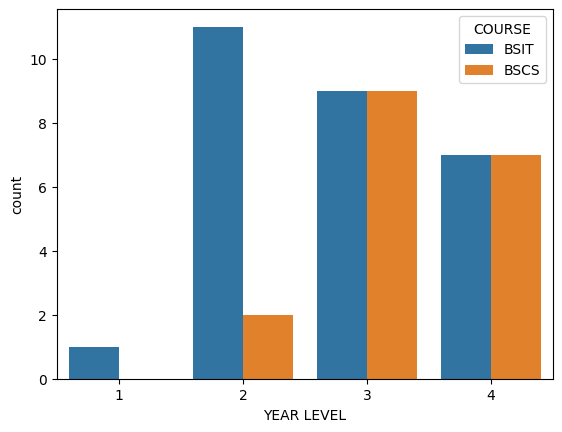

In [142]:
sns.countplot(x = "YEAR LEVEL", hue = 'COURSE', data=ccis_df)

The plot below shpw the BMI of all participants in each year levels and courses. It is kinda visible that there are now major difference between the BMI's of students in each year level (yes, the first year student kinda have a low score in BMI but we cannot conclude that first year students are near from being underweight).

<Axes: xlabel='YEAR LEVEL', ylabel='BMI'>

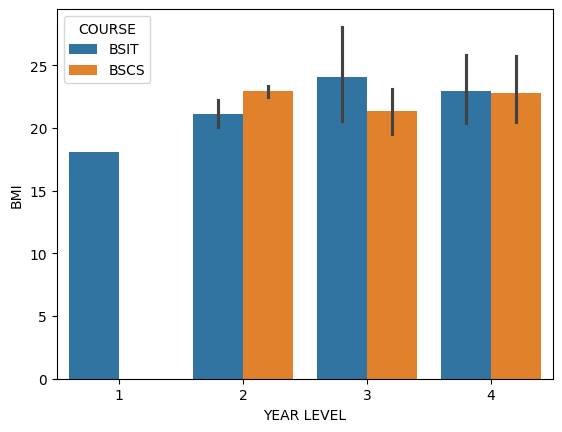

In [143]:
sns.barplot(data = ccis_df, y = 'BMI', x = 'YEAR LEVEL', hue = 'COURSE')

<Axes: xlabel='YEAR LEVEL', ylabel='BMI'>

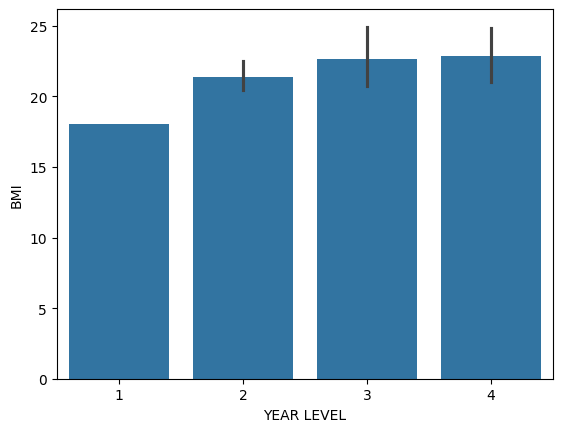

In [145]:
sns.barplot(data = ccis_df, y = 'BMI', x = 'YEAR LEVEL')

This last plot shows the count on the months the participants are born on. We can see that the is no significan year that standout so much aside the there are 7 participants are born on June, But still not enough to say that birthmonths affects the physicality of a person.

<Axes: xlabel='MONTH', ylabel='count'>

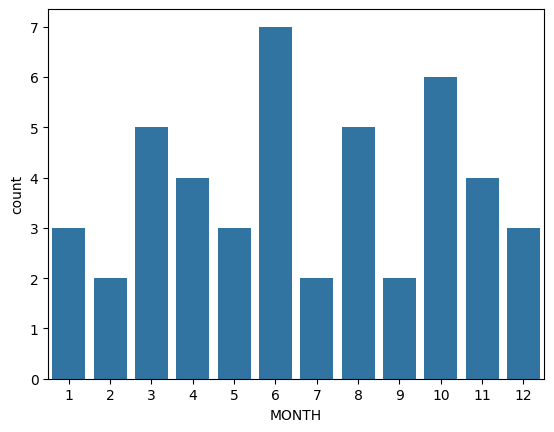

In [147]:
sns.countplot(data = ccis_df, x = 'MONTH')